# 回帰：住宅価格の予測

In [13]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() 

説明変数は全部で13種類あり、それぞれの意味は以下の通り。

- CRIM・・・犯罪発生率（人口単位）
- ZN・・・25,000平方フィート以上の住宅区画の割合
- INDUS・・・非小売業の土地面積の割合（人口単位）
- CHAS・・・チャールズ川沿いかどうか（1:Yes、0:No）
- NOX・・・窒素酸化物の濃度（pphm単位）
- RM・・・1戸あたりの平均部屋数
- AGE・・・1940年よりも前に建てられた家屋の割合
- DIS・・・ボストンの主な5つの雇用圏までの重み付き距離
- RAD・・・幹線道路へのアクセス指数
- TAX・・・10,000ドルあたりの所得税率
- PTRATIO・・・教師あたりの生徒の数（人口単位）
- B・・・黒人居住者の割合（人口単位）
- LSTAT・・・低所得者の割合


In [14]:
train_data.shape

(404, 13)

In [15]:
test_data.shape

(102, 13)

In [16]:
# 単位　千ドル
train_targets

array([ 15.2,  42.3,  50. ,  21.1,  17.7,  18.5,  11.3,  15.6,  15.6,
        14.4,  12.1,  17.9,  23.1,  19.9,  15.7,   8.8,  50. ,  22.5,
        24.1,  27.5,  10.9,  30.8,  32.9,  24. ,  18.5,  13.3,  22.9,
        34.7,  16.6,  17.5,  22.3,  16.1,  14.9,  23.1,  34.9,  25. ,
        13.9,  13.1,  20.4,  20. ,  15.2,  24.7,  22.2,  16.7,  12.7,
        15.6,  18.4,  21. ,  30.1,  15.1,  18.7,   9.6,  31.5,  24.8,
        19.1,  22. ,  14.5,  11. ,  32. ,  29.4,  20.3,  24.4,  14.6,
        19.5,  14.1,  14.3,  15.6,  10.5,   6.3,  19.3,  19.3,  13.4,
        36.4,  17.8,  13.5,  16.5,   8.3,  14.3,  16. ,  13.4,  28.6,
        43.5,  20.2,  22. ,  23. ,  20.7,  12.5,  48.5,  14.6,  13.4,
        23.7,  50. ,  21.7,  39.8,  38.7,  22.2,  34.9,  22.5,  31.1,
        28.7,  46. ,  41.7,  21. ,  26.6,  15. ,  24.4,  13.3,  21.2,
        11.7,  21.7,  19.4,  50. ,  22.8,  19.7,  24.7,  36.2,  14.2,
        18.9,  18.3,  20.6,  24.6,  18.2,   8.7,  44. ,  10.4,  13.2,
        21.2,  37. ,

ボストンデータセットは、以前に取り上げたMNIST、IMDBデータセットとは次の2点で少々異なる。

1点目は、データの数が506件と比較的少数であることで、検証用データをここから取り分けるため訓練に使用できるデータは更に減る。2点目は、それぞれの説明変数が異なるスケールを持っていることである。上記の通り、割合や人口比といったパーセントで表されるデータもあり、部屋数の平均のように数値で表されるデータもあり、川沿いか否かという0/1のデータもある。もちろんこのままニューラルネットに入力することもできるが、学習が難しくなる可能性がある。

上記2点のデータ特性に対応するため、ちょっとした操作が必要となる。
データの正規化

まずは2点目の特性に対応するため、データの正規化を行う。これは、スケールが揃っていない説明変数を、平均0、分散1となるように変換するもの。

In [17]:
train_data

array([[  1.23247000e+00,   0.00000000e+00,   8.14000000e+00, ...,
          2.10000000e+01,   3.96900000e+02,   1.87200000e+01],
       [  2.17700000e-02,   8.25000000e+01,   2.03000000e+00, ...,
          1.47000000e+01,   3.95380000e+02,   3.11000000e+00],
       [  4.89822000e+00,   0.00000000e+00,   1.81000000e+01, ...,
          2.02000000e+01,   3.75520000e+02,   3.26000000e+00],
       ..., 
       [  3.46600000e-02,   3.50000000e+01,   6.06000000e+00, ...,
          1.69000000e+01,   3.62250000e+02,   7.83000000e+00],
       [  2.14918000e+00,   0.00000000e+00,   1.95800000e+01, ...,
          1.47000000e+01,   2.61950000e+02,   1.57900000e+01],
       [  1.43900000e-02,   6.00000000e+01,   2.93000000e+00, ...,
          1.56000000e+01,   3.76700000e+02,   4.38000000e+00]])

In [19]:
# データを正規化(平均0、分散1に変換)する
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [20]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ..., 
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

1点目の特性である「データセットの少なさ」に対する対応。一般に、データのサンプル数が少なく学習モデルのパラメータ数が多い場合、過学習が起こりやすい。、過学習を避けるためには小さなニューラルネットを用いる。ここでは、隠れ層が2層、それぞれ64ノードのモデルを用いる。

In [23]:
from keras import models
from keras import layers

#同じモデルを複数回作成するため、関数にする
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [26]:
# クロスバリデーション
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

# K-fold cross validation
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
    axis=0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
    axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [28]:
all_scores

[1.9903437949643277,
 2.2767051540979066,
 3.0016077225751214,
 2.4016777052737699]

In [29]:
np.mean(all_scores)

2.4175835942277812

In [32]:
# epochs = 500
import numpy as np

num_epochs = 500 
all_mae_histories = [] 

for i in range(k):
    print('processing fold #', i, '/', k)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  # Prepares the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepares the training data: data from all other partitions
    if ( i==0 ):
        partial_train_data = train_data[num_val_samples:]
        partial_train_targets = train_targets[num_val_samples:]
    else:
        partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]], axis=0)
        partial_train_targets = np.concatenate( [train_targets[:i * num_val_samples],
            train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    print(len(val_data), len(partial_train_data))
    
    # Builds the Keras model (already compiled)
    model = build_model() 
    
    # Trains the model ( in silent mode, verbose=0 ) 
    history = model.fit(partial_train_data, partial_train_targets,
       validation_data=(val_data, val_targets),
       epochs=num_epochs, batch_size=1, verbose=0) 
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0 / 4
101 303
processing fold # 1 / 4
101 303
processing fold # 2 / 4
101 303
processing fold # 3 / 4
101 303


In [33]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

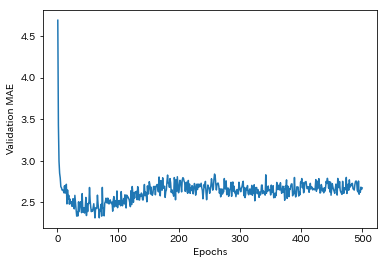

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

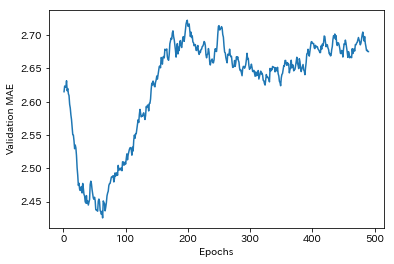

In [37]:
# 最初の10個のデータ点を除外
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previos = smoothed_points[-1]
            smoothed_points.append(previos * factor + point * (1- factor))
        else:
            smoothed_points.append(point)
            
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [38]:
# 学習エポック数を80回に固定
model = build_model()
model.fit(train_data, train_targets,
  epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [39]:
test_mae_score

2.7044748698963836